<a href="https://colab.research.google.com/github/Praveen3ravi/Machine_Learning/blob/main/EDA_TitanicDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [297]:
from google.colab import files
files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [298]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [299]:
traindf=pd.DataFrame(train)
testdf=pd.DataFrame(test)

In [300]:
traindf.shape
# testdf.shape

(891, 12)

In [301]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [302]:
traindf.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# EXPLORATORY DATA ANALYSIS:-
## FING NULL VALUES:

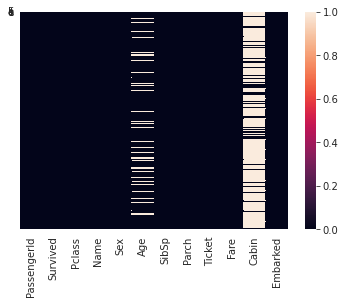

In [303]:
sns.heatmap(traindf.isnull(),yticklabels="False")

In [304]:
Age_mean=round(np.mean(traindf['Age']),0)
Age_mean

30.0

#DATA VISUALIZATION.
### UNDERSTANDING THE DATA.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


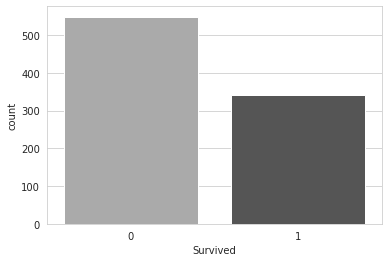

In [305]:
sns.set_style(style="whitegrid")
sns.countplot(traindf['Survived'],orient="h",palette="binary")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


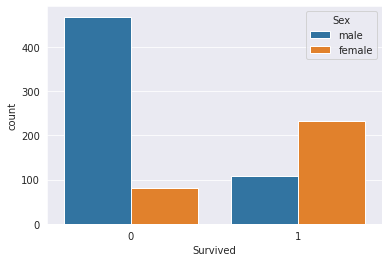

In [306]:
sns.set_style(style="darkgrid")
sns.countplot(traindf["Survived"],data=traindf,hue='Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


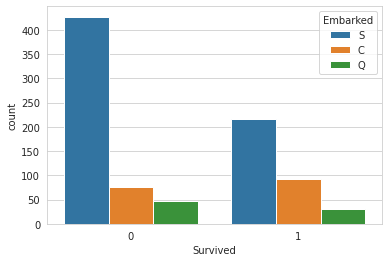

In [307]:
sns.set_style("whitegrid")
sns.countplot(traindf["Survived"],data=traindf,hue="Embarked")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


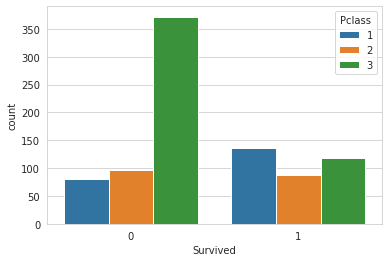

In [308]:
sns.set_style(style="whitegrid")
sns.countplot('Survived',data=traindf,hue="Pclass")

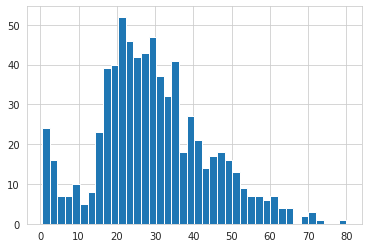

In [309]:
plt.hist(traindf['Age'],bins=40)
plt.show()

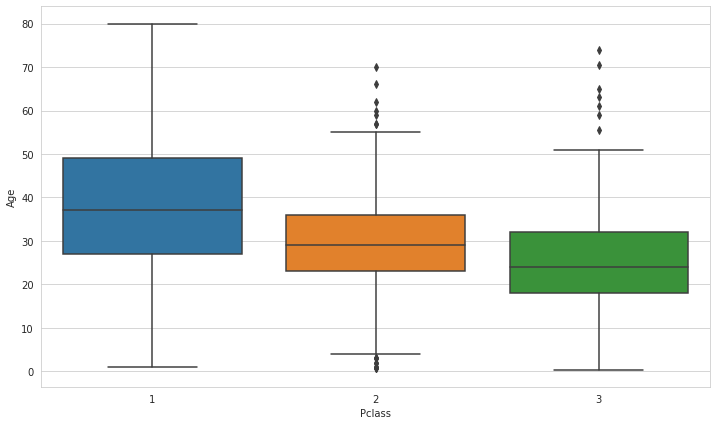

In [310]:
  plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=traindf)
plt.show()

In [311]:
def age(a):
  Age=a[0]
  Pclass=a[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age            

In [312]:
traindf['Age']=traindf[['Age','Pclass']].apply(age,axis=1)

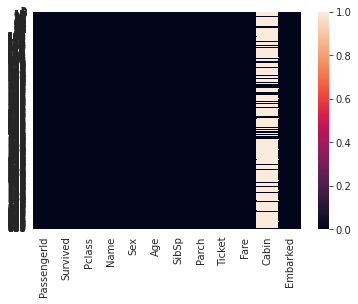

In [313]:
sns.heatmap(traindf.isnull(),yticklabels=True)
plt.show()

In [314]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


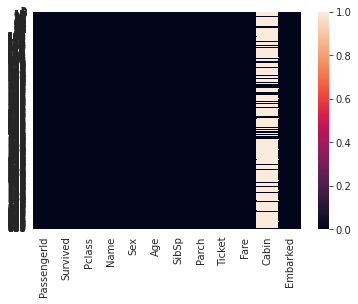

In [315]:
sns.heatmap(traindf.isnull(),yticklabels=True)
plt.show()

In [316]:
traindf=traindf.drop(['Cabin','Fare','Ticket','Parch','SibSp','Name'],axis=1)

In [317]:
traindf

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,24.0,S
889,890,1,1,male,26.0,C


In [318]:
sex=pd.get_dummies(traindf['Sex'],drop_first=True)
embark=pd.get_dummies(traindf['Embarked'],drop_first=True)

In [320]:
traindf=pd.concat([traindf,sex,embark],axis=1)

In [321]:
traindf

,PassengerId,Survived,Pclass,Sex,Age,Embarked,male,Q,S
0,1,0,3,male,22.0,S,1,0,1
1,2,1,1,female,38.0,C,0,0,0
2,3,1,3,female,26.0,S,0,0,1
3,4,1,1,female,35.0,S,0,0,1
4,5,0,3,male,35.0,S,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,1,0,1
887,888,1,1,female,19.0,S,0,0,1
888,889,0,3,female,24.0,S,0,0,1
889,890,1,1,male,26.0,C,1,0,0


In [323]:
traindf=traindf.drop(['Sex','Embarked'],axis=1)

In [325]:
from sklearn.model_selection import train_test_split 

In [326]:
X=traindf.drop('Survived',axis=1)
y=traindf['Survived']

In [327]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.30,random_state=0)

In [328]:
from sklearn.linear_model import LogisticRegression

In [329]:
logmodel=LogisticRegression()

In [330]:
logmodel.fit(X_Train,y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [331]:
prediction=logmodel.predict(X_Test)

In [332]:
from sklearn.metrics import confusion_matrix

In [338]:
cm=confusion_matrix(y_Test,prediction)

In [339]:
cm

array([[141,  27],
       [ 27,  73]])

In [340]:
from sklearn.metrics import accuracy_score

In [341]:
accuracy=accuracy_score(y_Test,prediction)
accuracy

0.7985074626865671

In [342]:
prediction

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])